Copyright (c) 2019 OERCompBiomed (UiB)

# A short "get-started" to object recognition in computer vision

###  "Hello World 2" (Fashion MNIST) using TF 2 / [Keras](https://www.tensorflow.org/beta/guide/keras)


**Object recognition** is a general term to describe a collection of related computer vision tasks that involve identifying objects in digital images. In this notebook we will consider the task:

- **Image Classification**: Predict the type or class of an object in an image.
  - *Input*: An image with a single object, such as a photograph or a medical image.
  - *Output*: A class label (e.g. one or more integers that are mapped to class labels).





Adapted from:<br>
https://github.com/tensorflow/docs/blob/master/site/en/r2/tutorials/quickstart/beginner.ipynb and <br>
https://github.com/tensorflow/docs/blob/master/site/en/r2//tutorials/keras/basic_classification.ipynb

In [1]:
# Copyright 2019 The TensorFlow Authors.
#
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

### See our `environment.yml` file for Tensorflow 2.0.0-beta installation in conda virtual environment (Seili) 
Within this environment we did a <br>
`!pip install -q tensorflow==2.0.0-beta`

In [3]:
# Check wether your are using the conda virtual environment
# commands are OS specific
import os
if os.name == 'nt':
    !where pip
    !where python
else:
    !which pip
    !which python    

C:\Users\arvid\Anaconda3\envs\Seili\Scripts\pip.exe
C:\Python27\Scripts\pip.exe
C:\Users\arvid\Anaconda3\envs\Seili\python.exe
C:\Python27\python.exe


In [4]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pydot
import graphviz
import seaborn as sns

In [5]:
print('tf version:', tf.__version__)
print('matplotlib version:', matplotlib.__version__)
print('pydot version:', pydot.__version__)
print('graphviz version:', graphviz.__version__)
print('seaborn version:', sns.__version__)

tf version: 2.0.0-beta1
matplotlib version: 3.1.0
pydot version: 1.4.1
graphviz version: 0.11.1
seaborn version: 0.9.0


This guide trains a neural network model to classify images of clothing, like sneakers and shirts and is a fast-paced overview of a complete TensorFlow program with the details explained as we go.

This guide also uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

## the Fashion MNIST dataset

[`Fashion-MNIST`](https://github.com/zalandoresearch/fashion-mnist) is a dataset of [Zalando](https://jobs.zalando.com/tech)'s article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a $28 \times 28$ grayscale image, associated with a label from $10$ classes (enumerated 0,1,2,...,9): 
```python
['t_shirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
```
Fashion-MNIST is intended to serve as a direct **drop-in replacement** for the original MNIST dataset for benchmarking machine learning algorithms. <br> Some good reasons for this replacement are: **MNIST is too easy** (convolutional nets can achieve 99.7% on MNIST and classic machine learning algorithms can also achieve 97% easily);
**MNIST is overused** ([Ian Goodfellow](https://twitter.com/goodfellow_ian/status/852591106655043584)); **MNIST can not represent modern CV tasks** ([François Chollet](https://twitter.com/fchollet/status/852594987527045120)). <br>
Fashion-MNIST shares the same image size and structure of training and testing splits.

Here's an example how the data looks (each class takes three-rows):

![fashion-mnist](assets/fashion-mnist-sprite.png)

**Loading Fashion-MNIST data with machine learning libraries** <br>
Several machine learning libraries have included `Fashion-MNIST` as a built-in dataset with their specific APIs, e.g.

- [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist)
- [Pytorch](https://pytorch.org/docs/master/torchvision/datasets.html#fashion-mnist)
- [Keras](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles)
- [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist)
- [Torch](https://github.com/mingloo/fashion-mnist)
- [JuliaML](https://github.com/JuliaML/MLDatasets.jl)


#### Video tutorial on Fashion-MNIST
*Machine Learning Meets Fashion* by Yufeng G @ Google Cloud

[![Machine Learning Meets Fashion](assets/ml_meets_fashion_video.png)](https://youtu.be/RJudqel8DVA)



In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents.

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image is mapped to a single label. Since the _class names_ are not included with the dataset, we store them here to use later when plotting the images:

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
unique_trn, counts_trn = np.unique(train_labels, return_counts=True)
dict(zip(unique_trn, counts_trn))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

The traning dataset is **balanced**, i.e. a situation where the number of observations is the same for all the classes in a classification dataset.

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

In [14]:
unique_tst, counts_tst = np.unique(test_labels, return_counts=True)
dict(zip(unique_tst, counts_tst))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

### Preprocess the data - normalize pixel values to be between 0 and 1

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

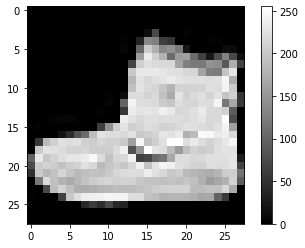

In [15]:
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

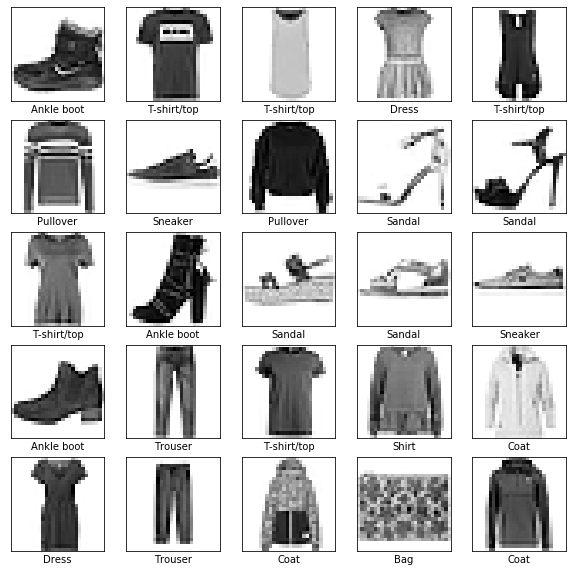

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.Greys)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build a sequential model using Flattening of input images

Building the neural network requires configuring the layers of the model, then compiling the model.

**Set up the layers**

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [18]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node [*softmax*](https://en.wikipedia.org/wiki/Softmax_function) layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


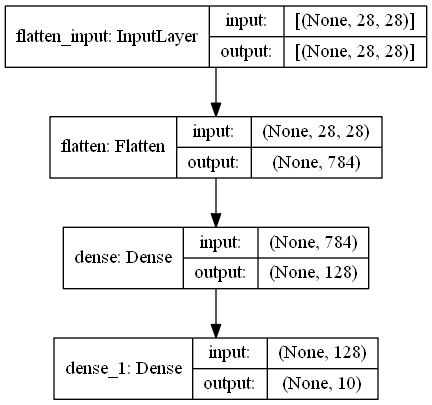

In [20]:
tf.keras.utils.plot_model(model1, '/tmp/my_first_fashion_mnist_model.png', show_shapes=True)

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In more detail:

[`tf.keras.Model.compile`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Model#compile) takes three important arguments:

 - `optimizer`: This object specifies the training procedure. Pass it optimizer instances from the [`tf.keras.optimizers`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/optimizers) module, such as [`tf.keras.optimizers.Adam`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/optimizers/Adam) or [`tf.keras.optimizers.SGD`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/optimizers/SGD). If you just want to use the default parameters, you can also specify optimizers via strings, such as 'adam' or 'sgd'.
 - `loss`: The function to minimize during optimization. Common choices include mean square error (`mse`), `categorical_crossentropy`, and `binary_crossentropy`. Loss functions are specified by name or by passing a callable object from the [`tf.keras.losses module`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses).
 - `metrics`: Used to monitor training. These are string names or callables from the [`tf.keras.metrics module`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics).
 - Additionally, to make sure the model trains and evaluates eagerly, you can make sure to pass `run_eagerly=True` as a parameter to compile.

In [21]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data.

In more detail (see [`tf.keras.Model.fit`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Model#fit)):

 - `epochs`: Training is structured into epochs. An epoch is one iteration over the entire input data (this is done in smaller batches).
 - `batch_size`: Integer or `None`. Number of samples per gradient update. If unspecified, batch_size will default to 32. When passed NumPy data, the model slices the data into smaller batches and iterates over these batches during training. This integer specifies the size of each batch. Be aware that the last batch may be smaller if the total number of samples is not divisible by the batch size.

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

In [22]:
model1.fit(train_images, 
           train_labels, 
           batch_size=32, 
           epochs=10,
           verbose=1) # =0 to suppress chatty output; use Tensorboard instead])

W0802 12:59:50.182104 22268 deprecation.py:323] From C:\Users\arvid\Anaconda3\envs\Seili\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5029 - accuracy: 0.8233
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3769 - accuracy: 0.8629
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3401 - accuracy: 0.8761
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3129 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2975 - accuracy: 0.8893
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2812 - accuracy: 0.8957
Epoch 7/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2672 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2606 - accuracy: 0.9026
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2474 - accuracy: 0.9086
Epoch 10/10
60

### Test the model

Next, compare how the model performs on the test dataset:

In [23]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3262 - accuracy: 0.8848

Test accuracy: 0.8848


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

### Make predictions with model1

With the model1 trained, we can use it to make predictions about some images.

In [24]:
predictions1 = model1.predict(test_images)

In [25]:
predictions1[0]

array([7.8058434e-07, 1.2345684e-10, 3.0746833e-08, 3.2152000e-11,
       3.2109928e-09, 2.4547146e-03, 5.3057306e-08, 2.8776107e-02,
       4.4796380e-09, 9.6876824e-01], dtype=float32)

In [26]:
np.argmax(predictions1[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [27]:
test_labels[0]

9

We can graph this to look at the full set of 10 class predictions.

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

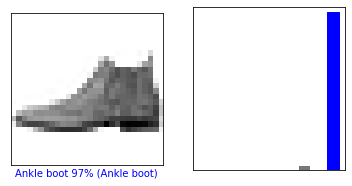

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions1,  test_labels)
plt.show()

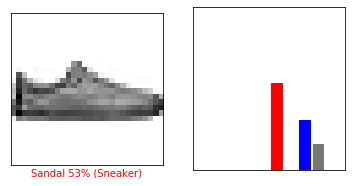

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions1,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label. Note that the model can be wrong even when very confident.

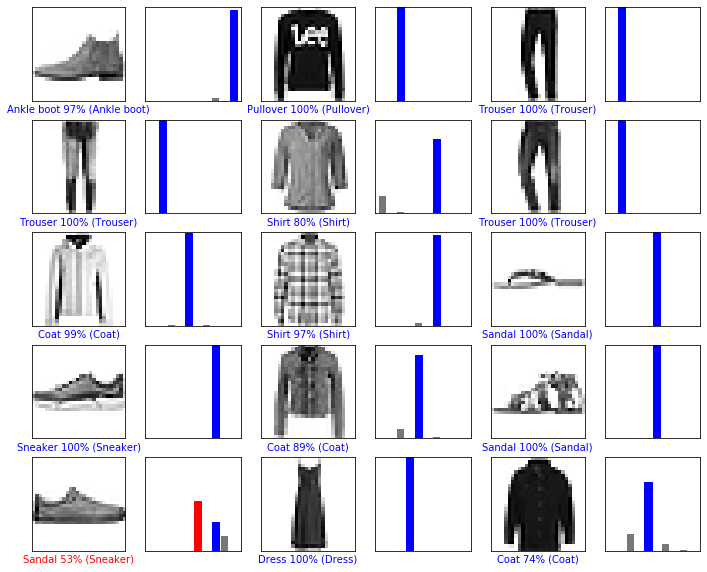

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions1, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions1, test_labels)
plt.show()

In [32]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though we're using a single image, we need to add it to a list:

In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [34]:
predictions_single = model1.predict(img)

print(predictions_single)

[[7.8058366e-07 1.2345733e-10 3.0746893e-08 3.2152062e-11 3.2109932e-09
  2.4547123e-03 5.3057313e-08 2.8776098e-02 4.4796131e-09 9.6876836e-01]]


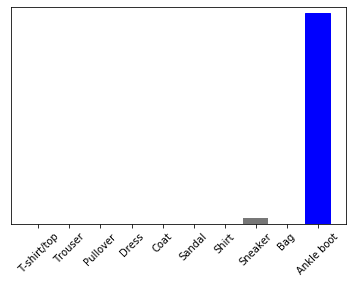

In [35]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [36]:
# And, as before, the model predicts a label of 9.
np.argmax(predictions_single[0])

9

### Confusion Matrix and Classification report (using flattening)

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred1 = np.argmax(predictions1, axis=1)
print(class_names, '\n')
print(confusion_matrix(test_labels, pred1))

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

[[880   1  12  16   2   2  81   0   6   0]
 [  4 981   0  11   2   0   1   0   1   0]
 [ 19   3 828  14  72   1  61   0   2   0]
 [ 27   7   7 898  33   1  24   0   3   0]
 [  2   2 123  31 767   0  69   0   6   0]
 [  0   0   0   0   0 964   0  30   1   5]
 [165   0 100  24  49   0 654   0   8   0]
 [  0   0   0   0   0   9   0 980   0  11]
 [  8   1   9   5   1   2   5   7 962   0]
 [  0   0   0   0   0  13   1  52   0 934]]


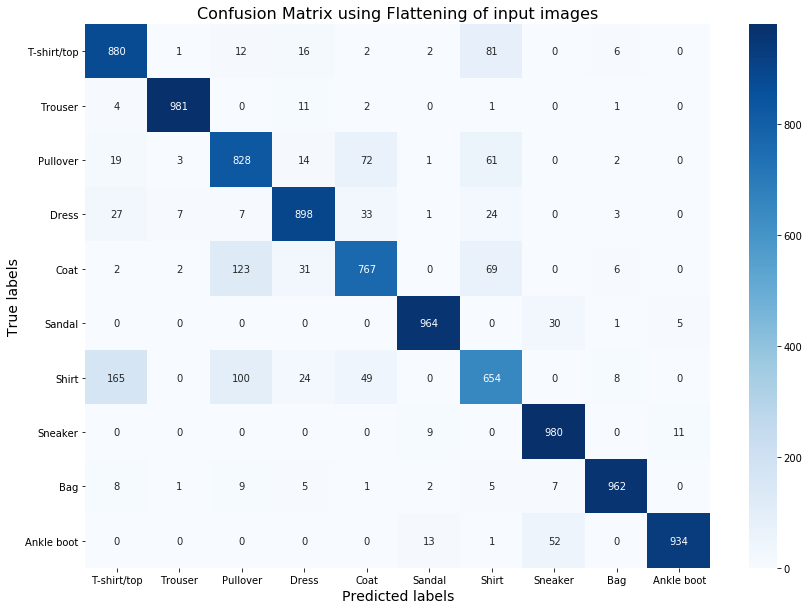

In [38]:
# Make a heatmap plot of the confusion matrix

fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(confusion_matrix(test_labels, pred1), 
            annot = True, # annot=True to annotate cells
            fmt = 'g',
            cmap = "Blues",
            ax = ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)
ax.set_title('Confusion Matrix using Flattening of input images', fontsize = 16) 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.yticks(rotation=0) 
plt.show()

In [39]:
print(classification_report(test_labels, pred1, target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.88      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.77      0.83      0.80      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.83      0.77      0.80      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.73      0.65      0.69      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.98      0.93      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



## Using a CNN model

In [40]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [41]:
# The complete architecture of the tensorflow model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

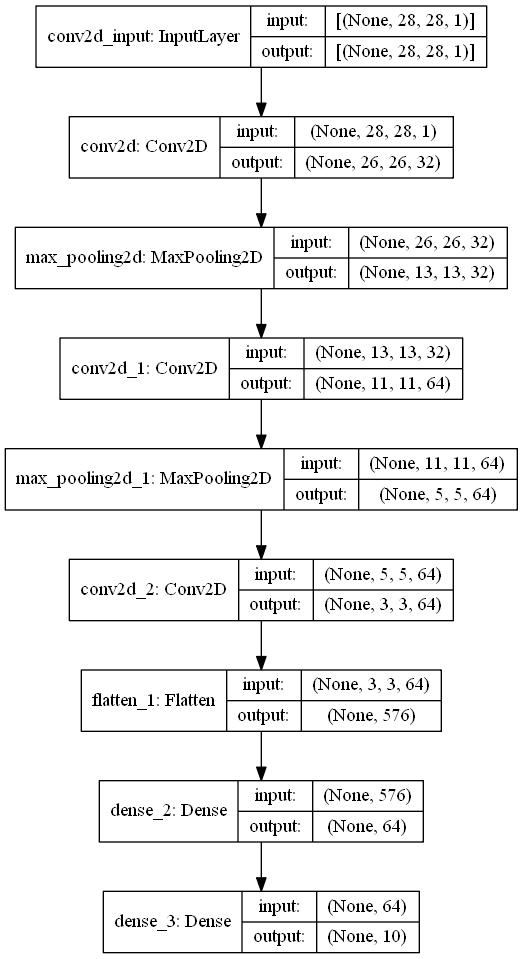

In [42]:
tf.keras.utils.plot_model(model2, '/tmp/my_second_fashion_mnist_model.png', show_shapes=True)

In [43]:
# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# ... expected conv2d_input to have 4 dimensions, but got array with shape (60000, 28, 28)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

### Train the model and log data

#### TensorBoard: Visualizing Learning

Before training, define the [Keras TensorBoard callback](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/callbacks/TensorBoard), specifying the log directory. By passing this callback to Model.fit(), you ensure that graph data is logged for visualization in TensorBoard.

See also: K. Wongsuphasawat, D. Smilkov et al, [Visualizing dataflow graphs of deep learning models in TensorFlow](http://idl.cs.washington.edu/files/2018-TensorFlowGraph-VAST.pdf), 2018

In [45]:
# Clear any logs from previous runs
!rm -rf logs 

In [46]:
# Define the Keras TensorBoard callback.
import os
from datetime import datetime

# Check if on Windows or (MacOs or Linux)
if os.name == 'nt':
    logdir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
else:
    logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [47]:
# Train the model
model2.fit(train_images, 
           train_labels, 
           batch_size=32, 
           epochs=10,
           verbose=1, # =0 to suppress chatty output; use Tensorboard instead
           callbacks=[tensorboard_callback])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 495us/sample - loss: 0.4927 - accuracy: 0.8204
Epoch 2/10
60000/60000 [==============================] - 33s 544us/sample - loss: 0.3201 - accuracy: 0.8826
Epoch 3/10
60000/60000 [==============================] - 37s 619us/sample - loss: 0.2735 - accuracy: 0.8990
Epoch 4/10
60000/60000 [==============================] - 45s 752us/sample - loss: 0.2419 - accuracy: 0.9102
Epoch 5/10
60000/60000 [==============================] - 50s 838us/sample - loss: 0.2191 - accuracy: 0.9179
Epoch 6/10
60000/60000 [==============================] - 47s 782us/sample - loss: 0.1983 - accuracy: 0.9252
Epoch 7/10
60000/60000 [==============================] - 51s 858us/sample - loss: 0.1780 - accuracy: 0.9335- loss: 0.1775 
Epoch 8/10
60000/60000 [==============================] - 51s 845us/sample - loss: 0.1618 - accuracy: 0.9388
Epoch 9/10
60000/60000 [==============================] - 46s 770us/sample - loss: 0.1481 

In [48]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
#notebook.display(port=6006, height=1000) 

In [49]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [50]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

No known TensorBoard instances running.


**Start TensorBoard within the notebook** using [magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html):

In [52]:
if os.name == 'nt':
    %tensorboard --logdir logs\\fit
else:
    %tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 4464), started 0:01:02 ago. (Use '!kill 4464' to kill it.)

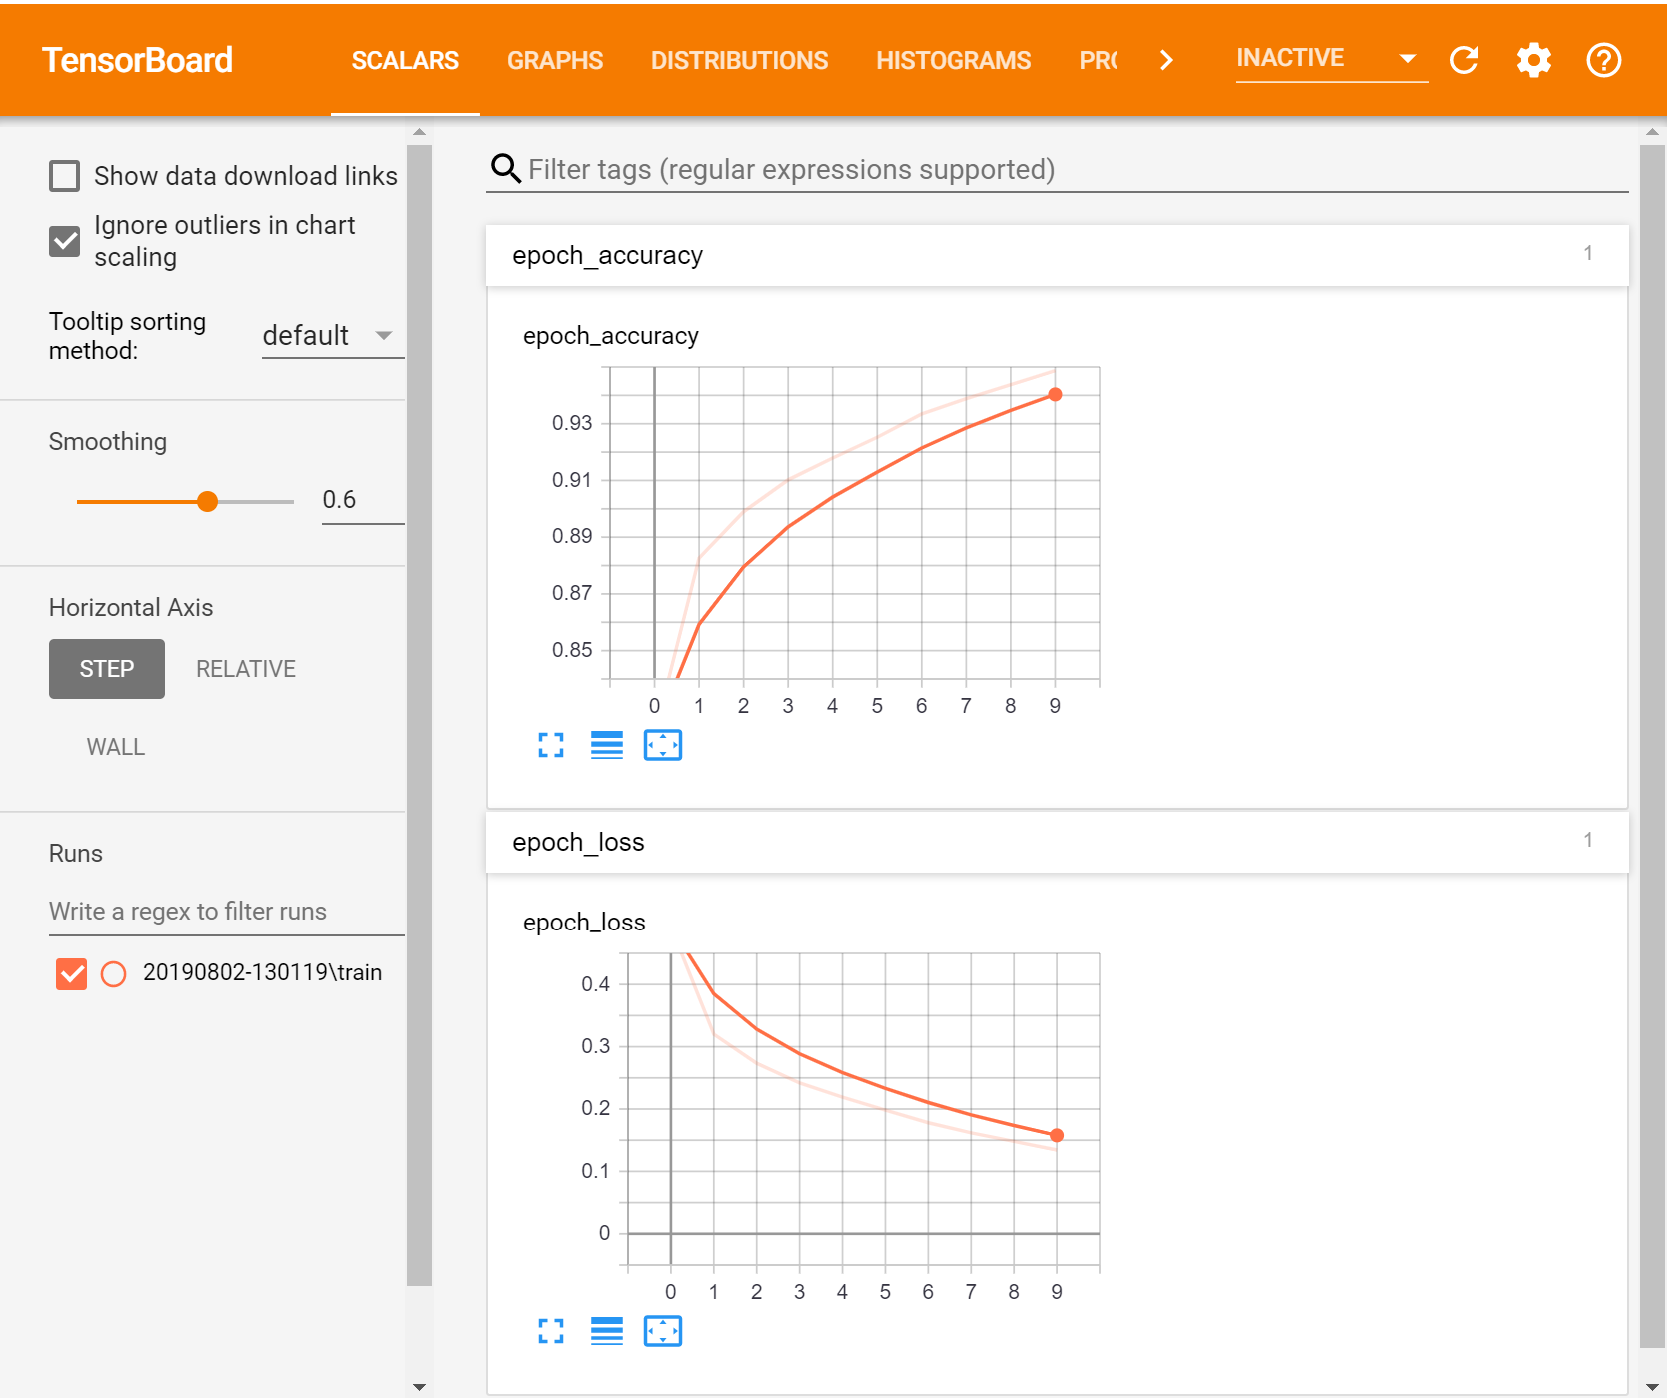

In [53]:
from IPython.display import Image
Image(filename='./assets/tensorboard_fashion_mnist.png')

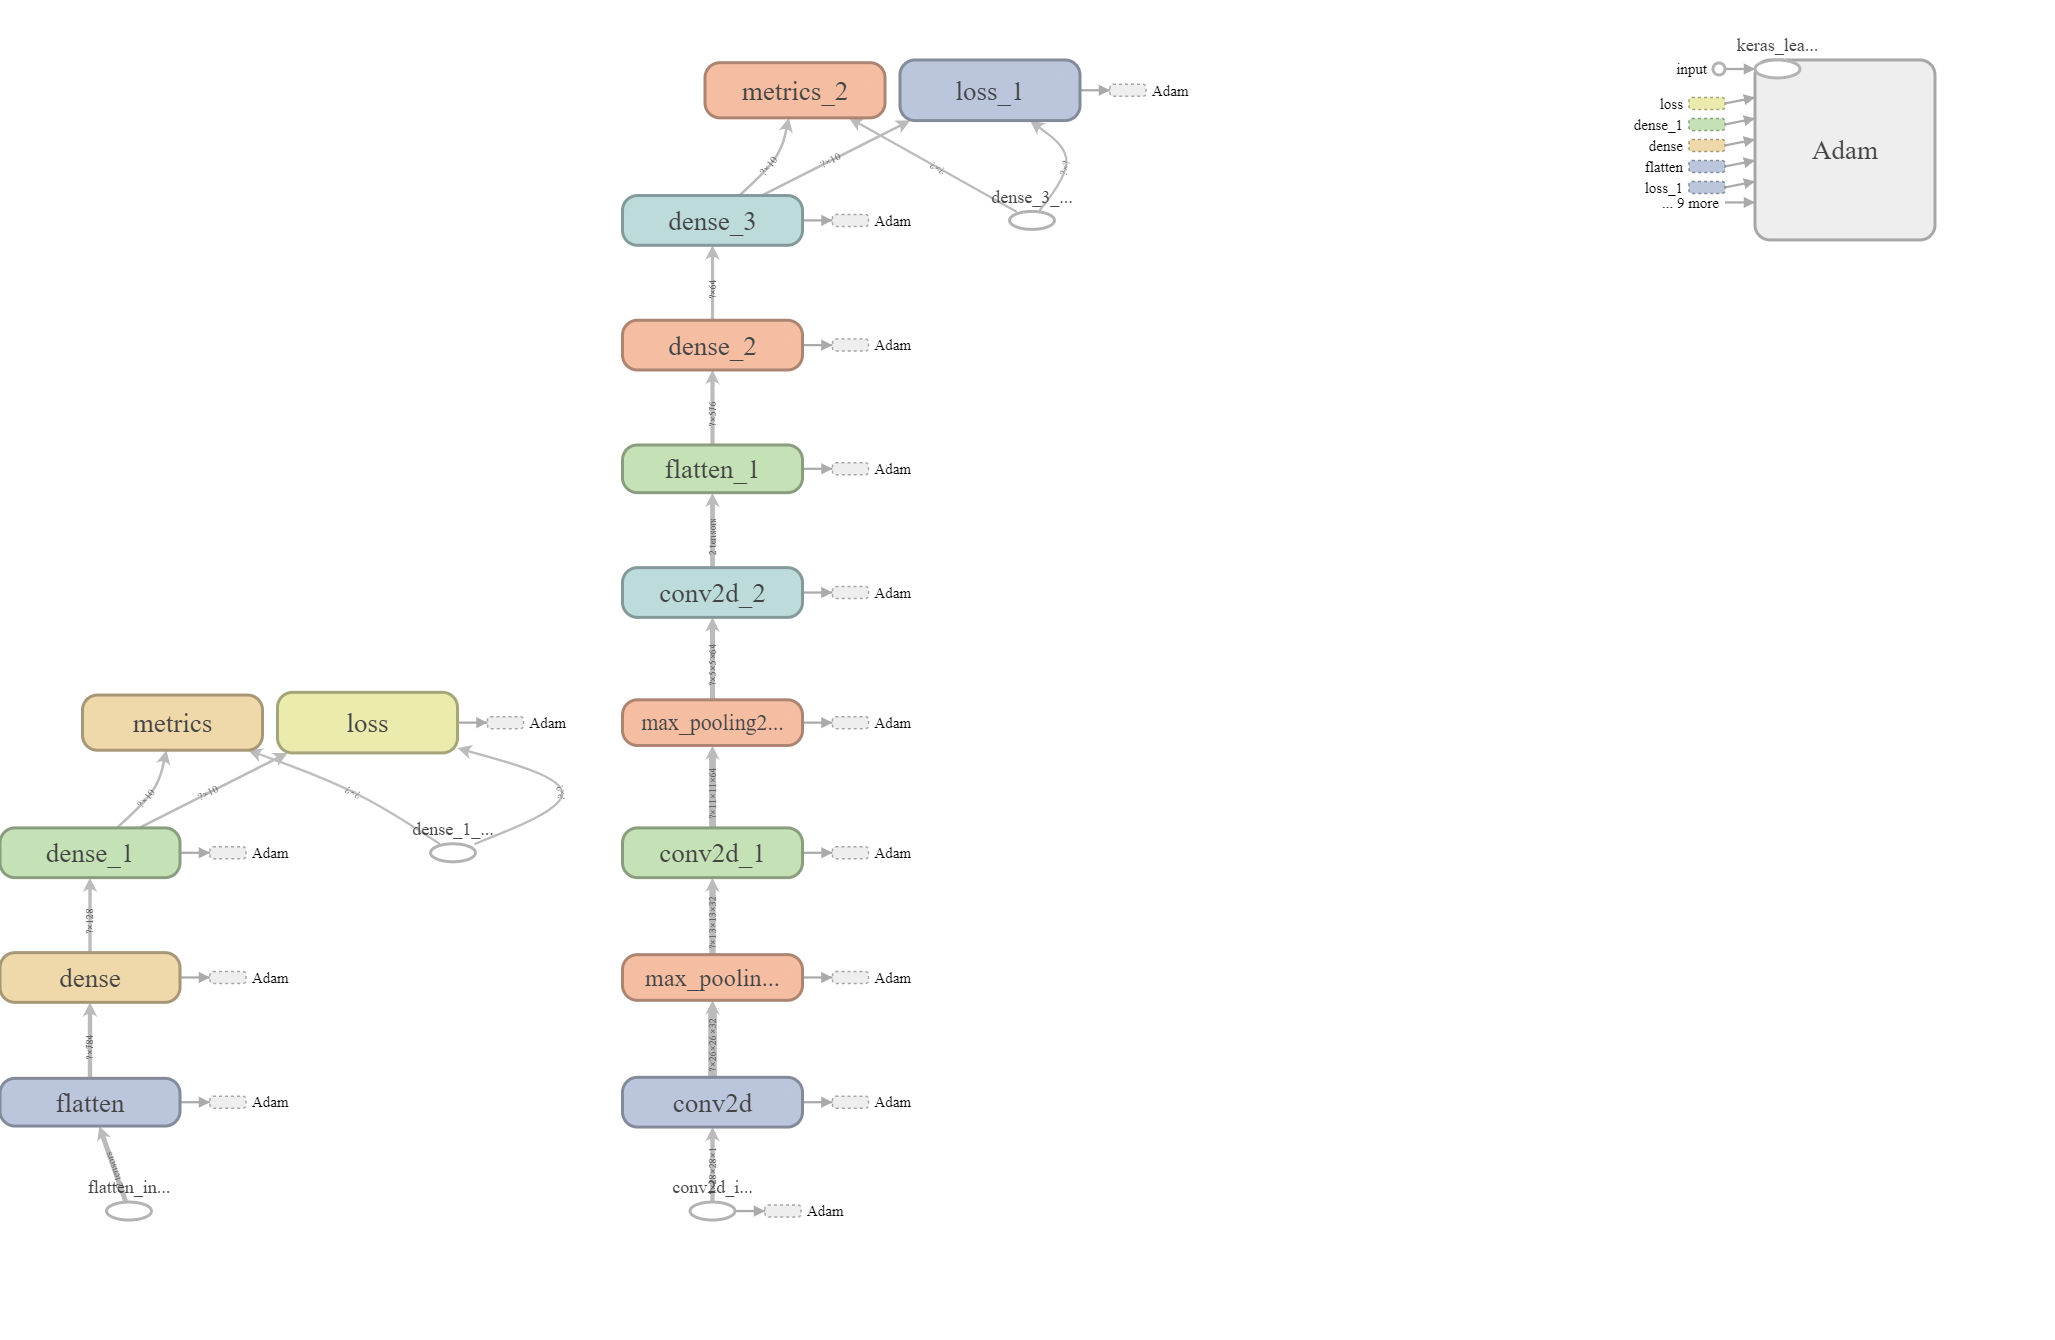

In [54]:
from IPython.display import Image
Image(filename='./assets/tensorboard_graph_fashion_mnist.png')

### Test the CNN model

In [55]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('\nTest accuracy using CNN:', test_acc)

10000/10000 [==============================] - 2s 151us/sample - loss: 0.2887 - accuracy: 0.9070

Test accuracy using CNN: 0.907


In [56]:
predictions2 = model2.predict(test_images)

In [57]:
predictions2[0]

array([1.7622556e-11, 6.7164074e-12, 4.8414155e-11, 5.3123711e-10,
       9.3623043e-12, 1.6189902e-05, 2.3741257e-11, 3.4283878e-06,
       4.8530433e-12, 9.9998033e-01], dtype=float32)

In [58]:
np.argmax(predictions2[0])

9

In [59]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

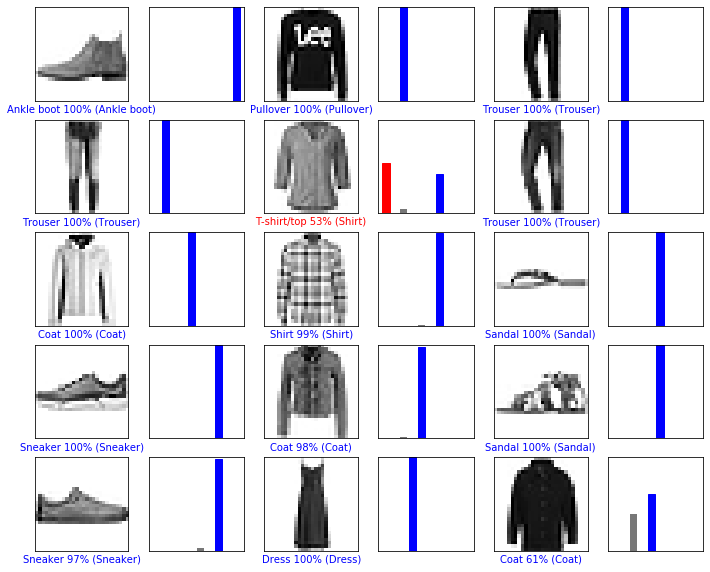

In [60]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions2, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions2, test_labels)
plt.show()

In [61]:
img14 = test_images[14].reshape((1,28,28,1))
predictions2_single = model2.predict(img14)

print(predictions2_single)

[[4.9530780e-05 2.8198716e-08 3.8799989e-01 1.6951613e-07 6.1038011e-01
  6.5206649e-07 1.5157597e-03 5.1743600e-06 4.7656369e-05 9.8642090e-07]]


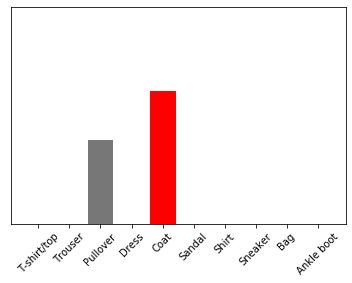

In [62]:
plot_value_array(0, predictions2_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

### Confusion matrix and Classification report using CNN

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred2 = np.argmax(predictions2, axis=1)
print(class_names, '\n')
print(confusion_matrix(test_labels, pred2))

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

[[828   0  20  45   3   3  95   0   6   0]
 [  1 977   1  15   2   0   3   0   1   0]
 [ 12   0 908   8  34   0  37   0   1   0]
 [  8   1   8 955  10   0  16   0   2   0]
 [  2   1  80  35 837   2  41   0   2   0]
 [  0   0   0   0   0 988   0   9   0   3]
 [106   0  87  47  64   1 684   0  11   0]
 [  0   0   0   0   0  15   0 967   0  18]
 [  5   0   5   5   2   3   8   7 965   0]
 [  0   0   0   0   0   4   0  35   0 961]]


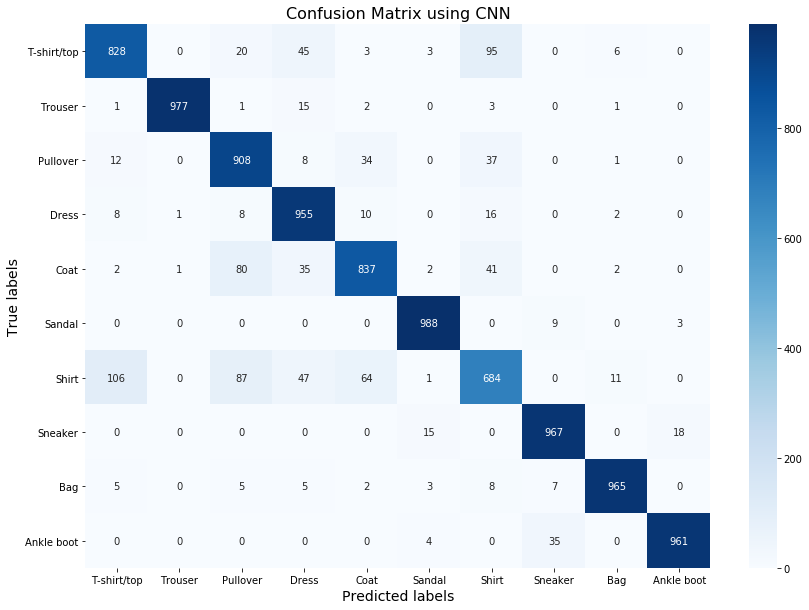

In [64]:
# Make a heatmap plot of the confusion matrix

fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(confusion_matrix(test_labels, pred2), 
            annot = True, # annot=True to annotate cells
            fmt = 'g',
            cmap = "Blues",
            ax = ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)
ax.set_title('Confusion Matrix using CNN', fontsize = 16) 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.yticks(rotation=0) 
plt.show()

In [65]:
print(classification_report(test_labels, pred2, target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.83      0.84      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.82      0.91      0.86      1000
       Dress       0.86      0.95      0.91      1000
        Coat       0.88      0.84      0.86      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.77      0.68      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## YOUR TURN:

- Using the Fashion-MNIST data, test different [Sequential](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Sequential) Keras models - `modelX = tf.keras.models.Sequential()` <br>and evaluate classification performances as above.

- To train a model with fit, you need to specify a [loss function](https://en.wikipedia.org/wiki/Loss_function), an [optimizer](https://en.wikipedia.org/wiki/Mathematical_optimization), and optionally, some [metrics](https://en.wikipedia.org/wiki/Precision_and_recall) to monitor. You pass these to the model as arguments to the `compile()` method. 
Test different [optimizers](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/optimizers), 
[loss](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses) functions, and
[metrics](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics)<br> 
 > modelX.compile(optimizer='xxx', loss='yyy', metrics=['zzz'])
 
See also:<br>
 https://www.tensorflow.org/beta/guide/keras/training_and_evaluation 

### To probe further (medical imaging):

[An overview of deep learning in medical imaging focusing on MRI](https://www.sciencedirect.com/science/article/pii/S0939388918301181). Zeitschrift für Medizinische Physik
Volume 29, Issue 2, May 2019, Pages 102-127.